In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
test=pd.read_csv('test.csv')

In [3]:
train=pd.read_csv('train.csv')

In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
test.shape


(5681, 11)

In [7]:
train.shape

(8523, 12)

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [11]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


{'whiskers': [<matplotlib.lines.Line2D at 0x21d49f29610>,
 'caps': [<matplotlib.lines.Line2D at 0x21d49f29bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21d49f29310>],
 'medians': [<matplotlib.lines.Line2D at 0x21d49f34190>],
 'fliers': [<matplotlib.lines.Line2D at 0x21d49f34460>],
 'means': []}

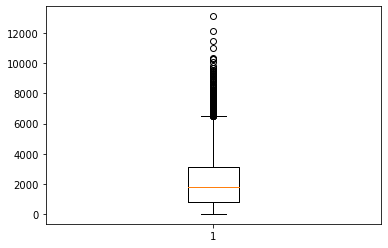

In [20]:
plt.boxplot(train['Item_Outlet_Sales'])


In [29]:
def remove_outliers(col):
 sorted(col)
 Q1,Q3=col.quantile([0.25,0.75])
 IQR=Q3-Q1
 lower_range=Q1-(1.5*IQR)
 Upper_range=Q3+(1.5*IQR)
 return lower_range,Upper_range

In [30]:
lowincome,uppincome=remove_outliers(train['Item_Outlet_Sales'])
train['Item_Outlet_Sales']=np.where(train['Item_Outlet_Sales']>uppincome,uppincome,train['Item_Outlet_Sales'])
train['Item_Outlet_Sales']=np.where(train['Item_Outlet_Sales']<lowincome,lowincome,train['Item_Outlet_Sales'])

{'whiskers': [<matplotlib.lines.Line2D at 0x21d4b043ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x21d4b04e0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21d4b0437f0>],
 'medians': [<matplotlib.lines.Line2D at 0x21d4b04e640>],
 'fliers': [<matplotlib.lines.Line2D at 0x21d4b04e910>],
 'means': []}

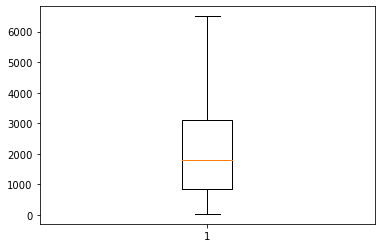

In [33]:
plt.boxplot(train['Item_Outlet_Sales'])


In [44]:
#duplicate find
duplicate=test.duplicated()
print(duplicate.sum())
test[duplicate]

0


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type


In [45]:
#duplicate find
duplicate=train.duplicated()
print(duplicate.sum())
train[duplicate]

0


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [46]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [47]:
test_data=test
test.dropna(how='any',inplace=True)

In [48]:
train.dropna(how='any',inplace=True)

In [49]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800000,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350000,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,12.695633,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [50]:
test.shape


(4075, 11)

In [51]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [52]:
train.shape

(6113, 12)

In [53]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

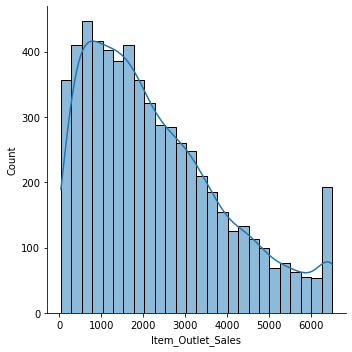

In [55]:
# Visualize distribution of variables
import seaborn as sns
sns.displot(train['Item_Outlet_Sales'], kde=True) # Visualize the distribution using a histogram


<AxesSubplot:>

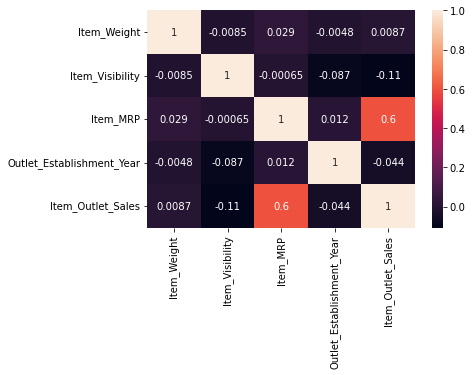

In [56]:
# Visualize the correlation between variables
sns.heatmap(train.corr(), annot=True) # Visualize the correlation using a heatmap


<AxesSubplot:>

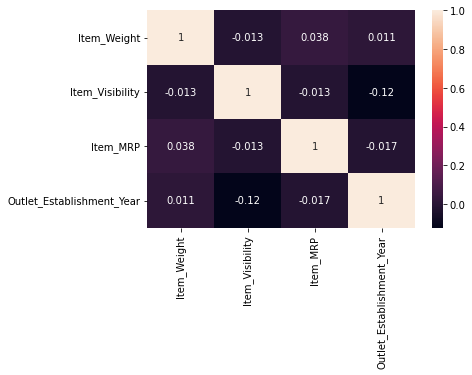

In [57]:
# Visualize the correlation between variables
sns.heatmap(test.corr(), annot=True) # Visualize the correlation using a heatmap


<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

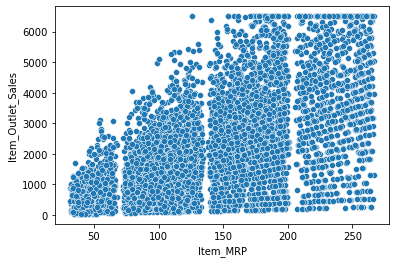

In [60]:
# Visualize the relationship between variables
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=train) # Visualize the relationship using a scatterplot


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Fat_Content'>

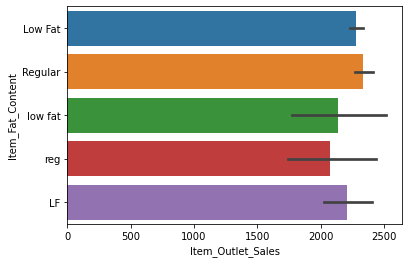

In [62]:
a=train["Item_Outlet_Sales"]
b=train['Item_Fat_Content']
sns.barplot(a,b)

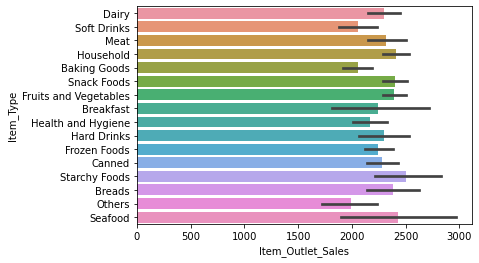

In [73]:
sns.barplot(x='Item_Outlet_Sales',y='Item_Type',data=train)      
plt.show()

In [74]:
#6).Univariate Analysis
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [75]:
train_mean=train['Item_Outlet_Sales'].mean()
train_mean

2292.767526320954

In [76]:
train_median=train['Item_Outlet_Sales'].median()
train_median

1928.1568

In [77]:
train_std=train['Item_Outlet_Sales'].std()
train_std

1647.3313578850057

In [78]:
train_freq=train['Item_Outlet_Sales'].value_counts()
train_freq

6501.8699    158
1342.2528     12
1438.1280     12
1845.5976     11
958.7520      11
            ... 
818.9340       1
2873.5928      1
1530.6742      1
5386.9878      1
2778.3834      1
Name: Item_Outlet_Sales, Length: 2911, dtype: int64

array([[<AxesSubplot:title={'center':'Item_Outlet_Sales'}>]], dtype=object)

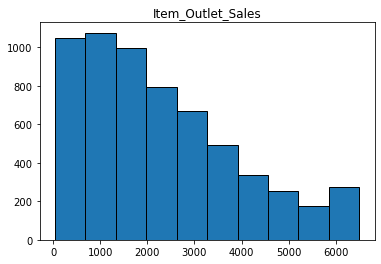

In [79]:
train.hist(column='Item_Outlet_Sales', grid=False, edgecolor='black')

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

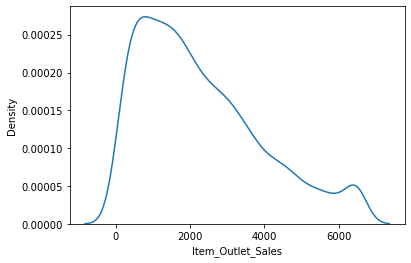

In [80]:
sns.kdeplot(train['Item_Outlet_Sales'])

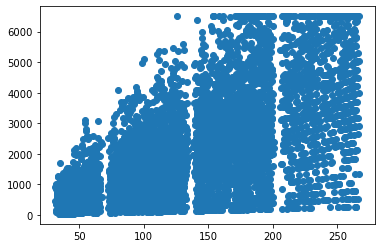

In [82]:
#Bivariate Analysis
plt.scatter(train.Item_MRP, train.Item_Outlet_Sales)
plt.xlabel=('Item_MRP')
plt.ylabel=('Item_Outlet_Sales')
plt.title=('Outlet_Establishment_Year vs. Item_Outlet_Sales')
plt.show()





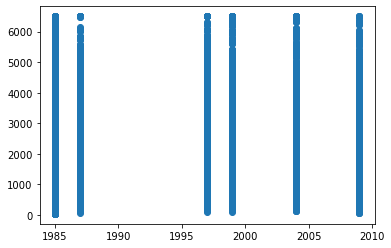

In [87]:
#Bivariate Analysis
plt.scatter(train.Outlet_Establishment_Year, train.Item_Outlet_Sales)
plt.xlabel=('Item_Outlet_Sales')
plt.ylabel=('Outlet_Establishment_Year')
plt.title=('Outlet_Establishment_Year vs. Item_Outlet_Sales')
plt.show()

In [88]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.008526,0.029214,-0.004779,0.008743
Item_Visibility,-0.008526,1.000000,-0.000651,-0.087452,-0.107716
Item_MRP,0.029214,-0.000651,1.000000,0.011632,0.597987
Outlet_Establishment_Year,-0.004779,-0.087452,0.011632,1.000000,-0.044062
Item_Outlet_Sales,0.008743,-0.107716,0.597987,-0.044062,1.000000


In [89]:
import statsmodels.api as sm
x=train['Item_MRP']
y=train['Item_Outlet_Sales']
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     3402.
Date:                Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:30:34   Log-Likelihood:                -52599.
No. Observations:                6113   AIC:                         1.052e+05
Df Residuals:                    6111   BIC:                         1.052e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.7023     41.894      1.353      0.1